In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style({'font.sans-serif':['simhei','Arial']})

%matplotlib inline
plt.rcParams["font.sans-serif"]=["Arial Unicode MS"] # 设置字体
plt.rcParams["axes.unicode_minus"]=False # 该语句解决图像中的“-”负号的乱码问题


In [241]:
df = pd.read_csv("../.datasets/cq-ershoufang-20220908.csv")
df.head(5)

,title,community,position,layout,area,towards,furnish,floor,year,build_type,tag,follow,unit_price,total_price
0,户型方正，房屋精装修，拎包可入住,虎溪花园,大学城,4室2厅,157.98平米,南,精装,低楼层(共11层),未知,板楼,"VR看装修,房本满两年,随时看房",11人关注 / 一年前发布,11584,183.0
1,金科天都住家装修一室一厅 中高楼层 采光视野无遮挡,金科廊桥天都,大学城,1室1厅,50.81平米,南,精装,24层,2012年建,板塔结合,"VR看装修,房本满五年,随时看房",8人关注 / 27天以前发布,9644,49.0
2,文旅城稀有的顶跃洋房，享别墅的待遇，带大露台,重庆融创万达文化旅游城长湖郡,西永,4室2厅,127.01平米,南北,毛坯,高楼层(共7层),未知,板楼,"VR房源,房本满两年,随时看房",2人关注 / 7个月以前发布,16298,207.0
3,龙湖高品质纯洋房社区 全新精装修 可拎包入住,龙湖西宸原著,大学城,4室2厅,136.5平米,南,精装,中楼层(共7层),未知,板楼,"VR看装修,房本满两年,随时看房",25人关注 / 4个月以前发布,15385,210.0
4,富力城天禧，精装三房双卫，视野无遮挡，随时看房。,富力城天禧,大学城,3室2厅,101.82平米,北,精装,高楼层(共33层),2018年建,塔楼,"VR看装修,房本满两年,随时看房",45人关注 / 11个月以前发布,12081,123.0


In [242]:
df.dtypes

title           object
community       object
position        object
layout          object
area            object
towards         object
furnish         object
floor           object
year            object
build_type      object
tag             object
follow          object
unit_price       int64
total_price    float64
dtype: object

In [243]:
df.isnull().sum()

title          0
community      0
position       0
layout         0
area           0
towards        0
furnish        0
floor          0
year           0
build_type     0
tag            6
follow         0
unit_price     0
total_price    0
dtype: int64

In [244]:
# 数据清洗
df["area"] = df["area"].str.extract("(\d+\.\d+)平米")
df.head(5)

,title,community,position,layout,area,towards,furnish,floor,year,build_type,tag,follow,unit_price,total_price
0,户型方正，房屋精装修，拎包可入住,虎溪花园,大学城,4室2厅,157.98,南,精装,低楼层(共11层),未知,板楼,"VR看装修,房本满两年,随时看房",11人关注 / 一年前发布,11584,183.0
1,金科天都住家装修一室一厅 中高楼层 采光视野无遮挡,金科廊桥天都,大学城,1室1厅,50.81,南,精装,24层,2012年建,板塔结合,"VR看装修,房本满五年,随时看房",8人关注 / 27天以前发布,9644,49.0
2,文旅城稀有的顶跃洋房，享别墅的待遇，带大露台,重庆融创万达文化旅游城长湖郡,西永,4室2厅,127.01,南北,毛坯,高楼层(共7层),未知,板楼,"VR房源,房本满两年,随时看房",2人关注 / 7个月以前发布,16298,207.0
3,龙湖高品质纯洋房社区 全新精装修 可拎包入住,龙湖西宸原著,大学城,4室2厅,136.5,南,精装,中楼层(共7层),未知,板楼,"VR看装修,房本满两年,随时看房",25人关注 / 4个月以前发布,15385,210.0
4,富力城天禧，精装三房双卫，视野无遮挡，随时看房。,富力城天禧,大学城,3室2厅,101.82,北,精装,高楼层(共33层),2018年建,塔楼,"VR看装修,房本满两年,随时看房",45人关注 / 11个月以前发布,12081,123.0


In [245]:
df["area"] = df["area"].astype("float")

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11970 entries, 0 to 11969
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        11970 non-null  object 
 1   community    11970 non-null  object 
 2   position     11970 non-null  object 
 3   layout       11970 non-null  object 
 4   area         10281 non-null  float64
 5   towards      11970 non-null  object 
 6   furnish      11970 non-null  object 
 7   floor        11970 non-null  object 
 8   year         11970 non-null  object 
 9   build_type   11970 non-null  object 
 10  tag          11964 non-null  object 
 11  follow       11970 non-null  object 
 12  unit_price   11970 non-null  int64  
 13  total_price  11970 non-null  float64
dtypes: float64(2), int64(1), object(11)
memory usage: 1.3+ MB


In [247]:
df.describe()

,area,unit_price,total_price
count,10281.000000,11970.000000,11970.000000
mean,107.514944,14549.387552,164.359682
std,53.483700,4705.902252,132.312829
min,16.800000,3630.000000,12.500000
25%,78.780000,11370.000000,98.000000
50%,96.020000,13727.000000,130.000000
75%,125.270000,16719.500000,187.450000
max,1109.610000,58937.000000,2898.000000


In [248]:
# 筛选
df = df[(df.total_price <= 500.0) & (df.area < 400.0)]
df.head()

,title,community,position,layout,area,towards,furnish,floor,year,build_type,tag,follow,unit_price,total_price
0,户型方正，房屋精装修，拎包可入住,虎溪花园,大学城,4室2厅,157.98,南,精装,低楼层(共11层),未知,板楼,"VR看装修,房本满两年,随时看房",11人关注 / 一年前发布,11584,183.0
1,金科天都住家装修一室一厅 中高楼层 采光视野无遮挡,金科廊桥天都,大学城,1室1厅,50.81,南,精装,24层,2012年建,板塔结合,"VR看装修,房本满五年,随时看房",8人关注 / 27天以前发布,9644,49.0
2,文旅城稀有的顶跃洋房，享别墅的待遇，带大露台,重庆融创万达文化旅游城长湖郡,西永,4室2厅,127.01,南北,毛坯,高楼层(共7层),未知,板楼,"VR房源,房本满两年,随时看房",2人关注 / 7个月以前发布,16298,207.0
3,龙湖高品质纯洋房社区 全新精装修 可拎包入住,龙湖西宸原著,大学城,4室2厅,136.50,南,精装,中楼层(共7层),未知,板楼,"VR看装修,房本满两年,随时看房",25人关注 / 4个月以前发布,15385,210.0
4,富力城天禧，精装三房双卫，视野无遮挡，随时看房。,富力城天禧,大学城,3室2厅,101.82,北,精装,高楼层(共33层),2018年建,塔楼,"VR看装修,房本满两年,随时看房",45人关注 / 11个月以前发布,12081,123.0


In [249]:
df.groupby('position')['community'].count().sort_values(ascending=False).to_frame().reset_index()

,position,community
0,大学城,1252
1,大坪,982
2,西永,768
3,解放碑,568
4,化龙桥,493
...,...,...
67,渝碚路,5
68,大石坝,5
69,海尔路,5
70,财富中心,3


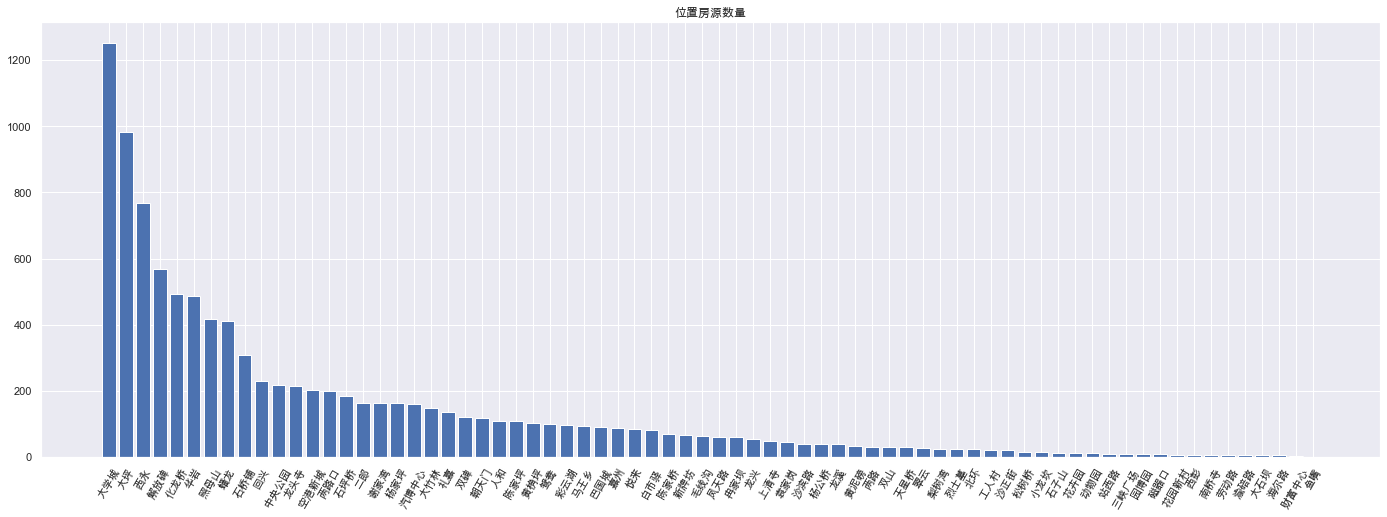

In [251]:
# 位置房源数量
position_number = df.groupby('position')['community'].count().sort_values(ascending=False).to_frame().reset_index()
plt.figure(figsize=(24,8))
plt.bar(position_number.position, position_number.community)
plt.title('位置房源数量')
# plt.xticks(position_number.index)
plt.xticks(rotation=60)
plt.show()

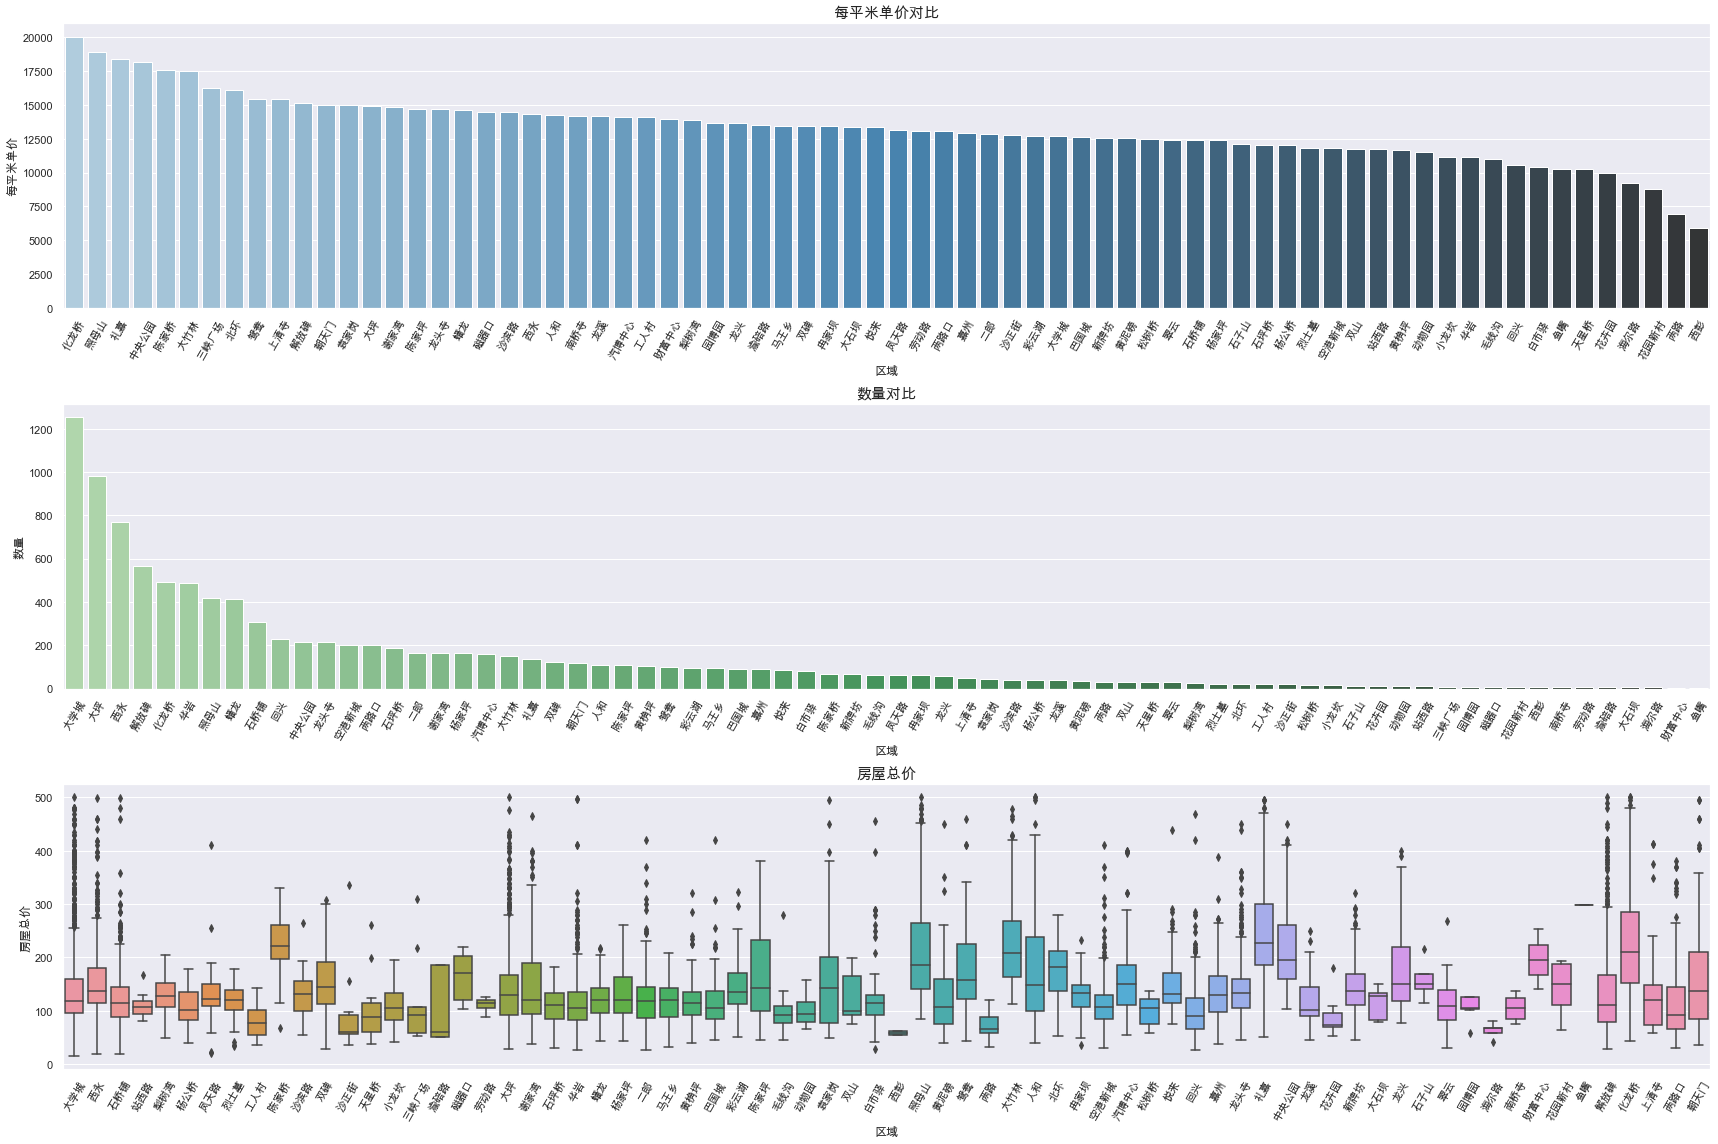

In [252]:
df_house_count = df.groupby('position')['total_price'].count().sort_values(ascending=False).to_frame().reset_index()
df_house_mean = df.groupby('position')['unit_price'].mean().sort_values(ascending=False).to_frame().reset_index()

f, [ax1,ax2,ax3] = plt.subplots(3,1,figsize=(24,16))

sns.barplot(x='position', y='unit_price', palette="Blues_d", data=df_house_mean, ax=ax1)
ax1.set_xticklabels(df_house_mean.position,rotation=60)
ax1.set_title('每平米单价对比',fontsize=15)
ax1.set_xlabel('区域')
ax1.set_ylabel('每平米单价')

sns.barplot(x='position', y='total_price', palette="Greens_d", data=df_house_count, ax=ax2)
ax2.set_xticklabels(df_house_count.position,rotation=60)
ax2.set_title('数量对比',fontsize=15)
ax2.set_xlabel('区域')
ax2.set_ylabel('数量')

sns.boxplot(x='position', y='total_price', data=df, ax=ax3)
ax3.set_title('房屋总价',fontsize=15)
ax3.set_xlabel('区域')
ax3.set_ylabel('房屋总价')
plt.xticks(rotation=60)

f.tight_layout() # 子图间隔
plt.show()

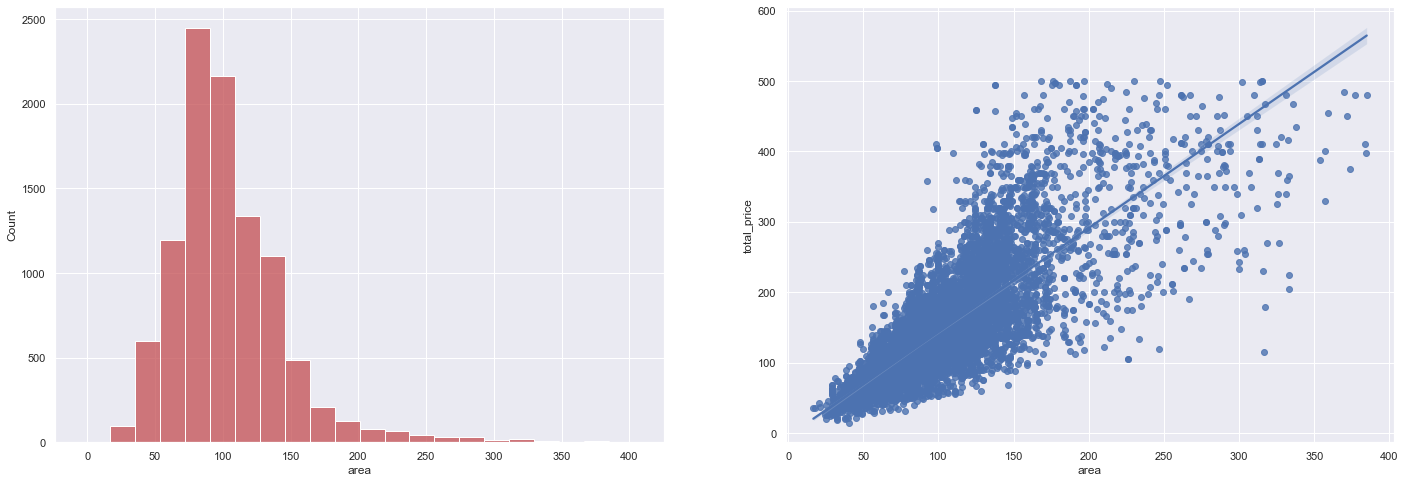

In [253]:
# 面积特征分析
f, [ax1,ax2] = plt.subplots(1, 2, figsize=(24, 8))
# 建房面积的分布情况
sns.histplot(df['area'], bins=20, ax=ax1, color='r')
sns.kdeplot(df['area'], shade=True, ax=ax1)
# 建房面积和出售价格的关系
sns.regplot(x='area', y='total_price', data=df, ax=ax2)

plt.show()

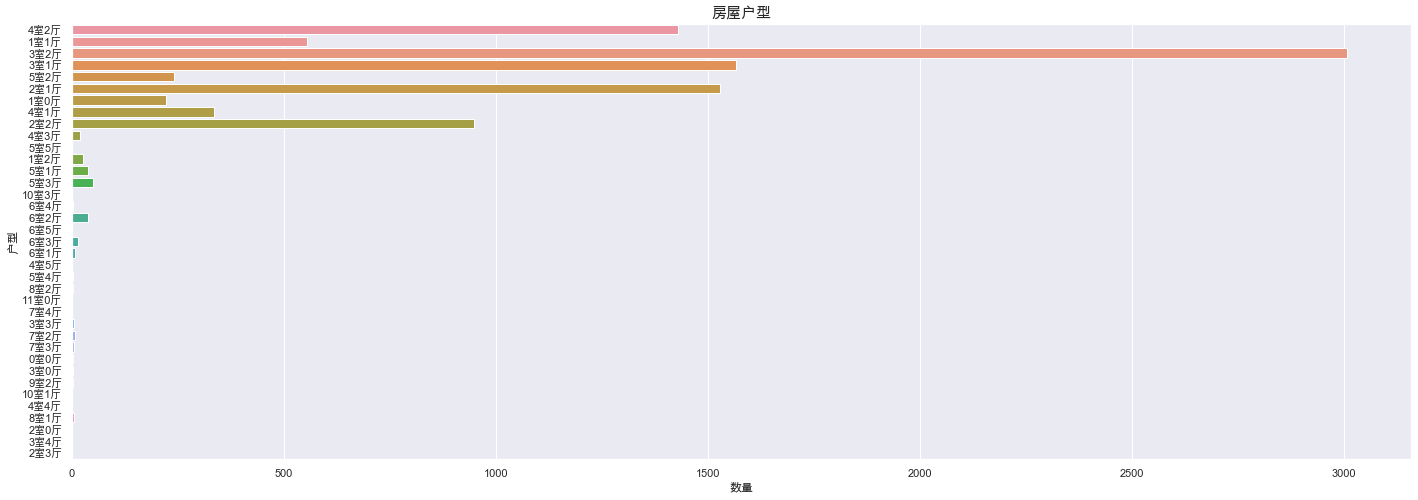

In [254]:
# 户型分析
f, ax1= plt.subplots(figsize=(24,8))
sns.countplot(y='layout', data=df, ax=ax1)
ax1.set_title('房屋户型',fontsize=15)
ax1.set_xlabel('数量')
ax1.set_ylabel('户型')
plt.show()